In [ ]:
# Superstore Sales Data Analysis

In [ ]:
# Step 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# 2. Data Exploration

In [4]:
df.shape
df.columns
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.nunique()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [ ]:
# 3. Data Cleaning

In [5]:
df.drop_duplicates(inplace=True)
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Category"] = df["Category"].astype("category")
df["Sub-Category"] = df["Sub-Category"].astype("category")
df["Region"] = df["Region"].astype("category")
df["Segment"] = df["Segment"].astype("category")
df["Ship Mode"] = df["Ship Mode"].astype("category")

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code               int64
Region                 category
Product ID               object
Category               category
Sub-Category           category
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
# 4. Exploratory Data Analysis

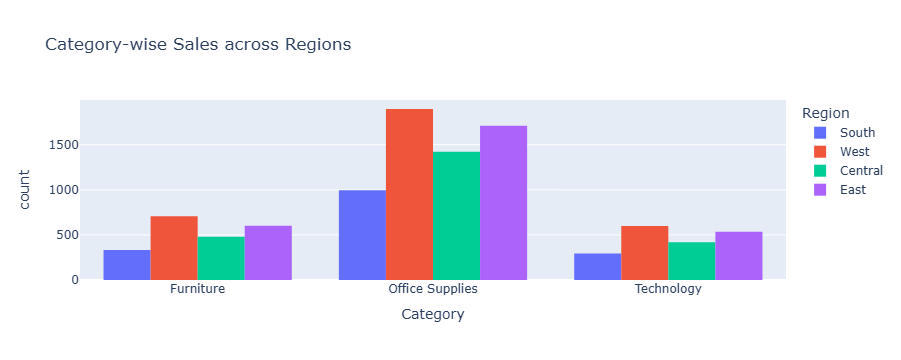

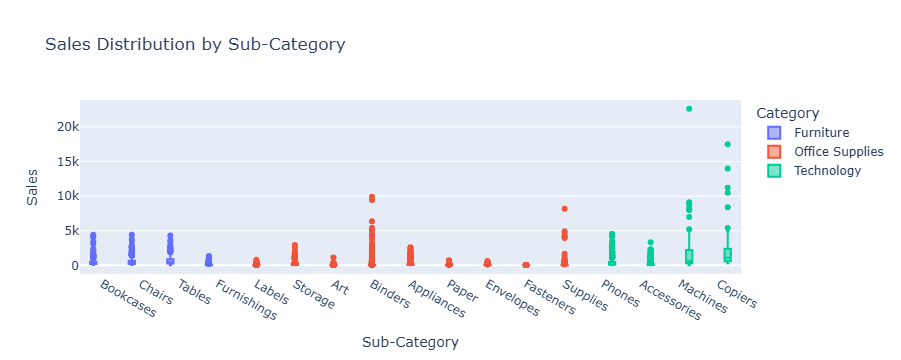

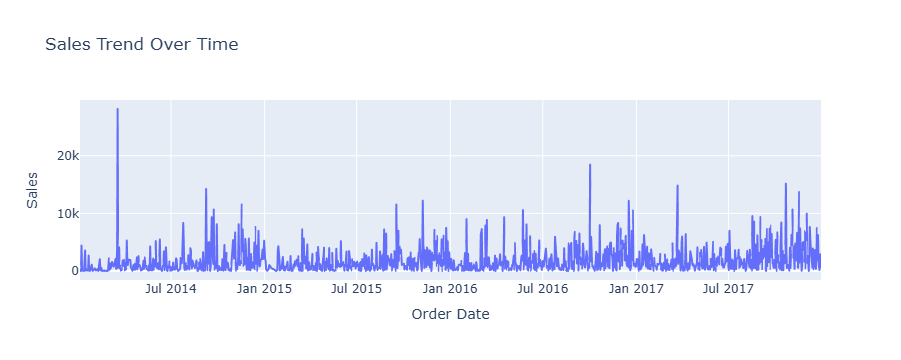

In [11]:
import plotly.express as px

fig1 = px.histogram(df, x="Category", color="Region", barmode="group", title="Category-wise Sales across Regions")
fig1.show()

fig2 = px.box(df, x="Sub-Category", y="Sales", color="Category", title="Sales Distribution by Sub-Category")
fig2.show()

fig3 = px.line(df.groupby("Order Date")["Sales"].sum().reset_index(), x="Order Date", y="Sales", title="Sales Trend Over Time")
fig3.show()

In [ ]:
# Profit Analysis and Regional Performance

C:\Users\Tripura\AppData\Local\Temp\ipykernel_13920\2298685810.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



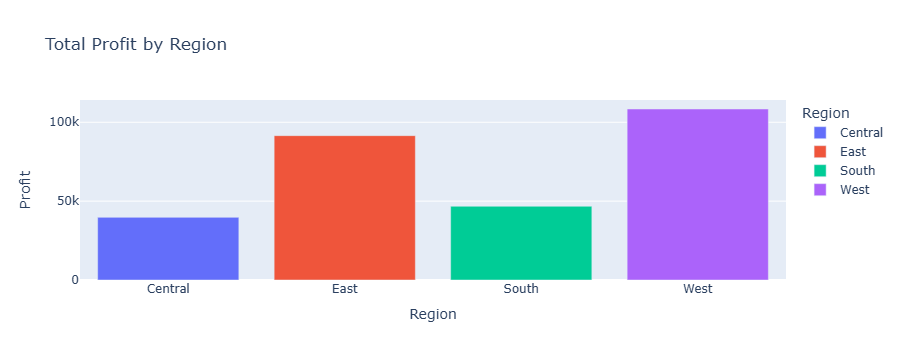

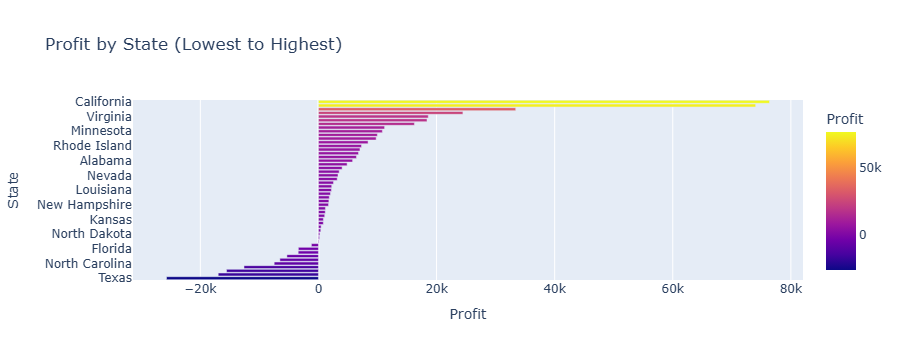

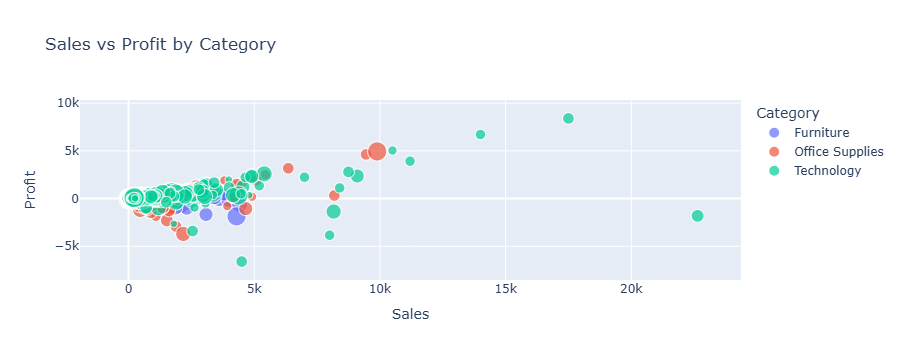

In [12]:
fig4 = px.bar(df.groupby("Region")["Profit"].sum().reset_index(), x="Region", y="Profit", color="Region", title="Total Profit by Region")
fig4.show()

fig5 = px.bar(df.groupby("State")["Profit"].sum().sort_values().reset_index(), x="Profit", y="State", color="Profit", title="Profit by State (Lowest to Highest)")
fig5.show()

fig6 = px.scatter(df, x="Sales", y="Profit", color="Category", size="Quantity", hover_data=["Sub-Category"], title="Sales vs Profit by Category")
fig6.show()

In [ ]:
# 5. Key Business Insights & Summary Tables

In [3]:
from IPython.display import display

cat_profit = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Profit", ascending=False)
display(cat_profit)

subcat_profit = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().reset_index().sort_values(by="Profit", ascending=False)
display(subcat_profit)

segment_region = df.groupby(["Segment", "Region"])[["Sales", "Profit"]].sum().reset_index()
display(segment_region)

top_customers = df.groupby("Customer Name")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False).head(10).reset_index()
display(top_customers)

bottom_customers = df.groupby("Customer Name")[["Sales", "Profit"]].sum().sort_values(by="Profit").head(10).reset_index()
display(bottom_customers)

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
1,Office Supplies,719047.0320,122490.8008
0,Furniture,741999.7953,18451.2728


,Sub-Category,Sales,Profit
6,Copiers,149528.0300,55617.8249
13,Phones,330007.0540,44515.7306
0,Accessories,167380.3180,41936.6357
12,Paper,78479.2060,34053.5693
3,Binders,203412.7330,30221.7633
5,Chairs,328449.1030,26590.1663
14,Storage,223843.6080,21278.8264
1,Appliances,107532.1610,18138.0054
9,Furnishings,91705.1640,13059.1436
7,Envelopes,16476.4020,6964.1767


,Segment,Region,Sales,Profit
0,Consumer,Central,252031.4340,8564.0481
1,Consumer,East,350908.1670,41190.9843
2,Consumer,South,195580.9710,26913.5728
3,Consumer,West,362880.7730,57450.6040
4,Corporate,Central,157995.8128,18703.9020
5,Corporate,East,200409.3470,23622.5789
6,Corporate,South,121885.9325,15215.2232
7,Corporate,West,225855.2745,34437.4299
8,Home Office,Central,91212.6440,12438.4124
9,Home Office,East,127463.7260,26709.2168


,Customer Name,Sales,Profit
0,Tamara Chand,19052.218,8981.3239
1,Raymond Buch,15117.339,6976.0959
2,Sanjit Chand,14142.334,5757.4119
3,Hunter Lopez,12873.298,5622.4292
4,Adrian Barton,14473.571,5444.8055
5,Tom Ashbrook,14595.620,4703.7883
6,Christopher Martinez,8954.020,3899.8904
7,Keith Dawkins,8181.256,3038.6254
8,Andy Reiter,6608.448,2884.6208
9,Daniel Raglin,8350.868,2869.0760


,Customer Name,Sales,Profit
0,Cindy Stewart,5690.055,-6626.3895
1,Grant Thornton,9351.212,-4108.6589
2,Luke Foster,3930.509,-3583.9770
3,Sharelle Roach,3233.481,-3333.9144
4,Henry Goldwyn,3247.642,-2797.9635
5,Nathan Cano,2218.990,-2204.8072
6,Sean Braxton,8057.891,-2082.7451
7,Sean Miller,25043.050,-1980.7393
8,Christine Phan,5888.275,-1850.3029
9,Natalie Fritzler,8322.826,-1695.9714


In [ ]:
# 6. Correlation Heatmap

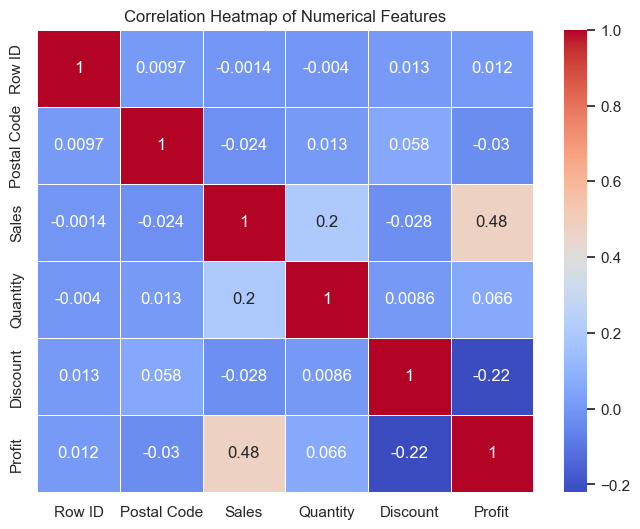

In [4]:
numeric_cols = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# Research Question: 
# How do category and region influence profitability, and which segments are loss-making?

In [ ]:
# 7. Trend & Insight Analysis

C:\Users\Tripura\AppData\Local\Temp\ipykernel_4200\1038284089.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Order Date')[["Sales", "Profit"]].sum().plot()


<Figure size 1000x400 with 0 Axes>

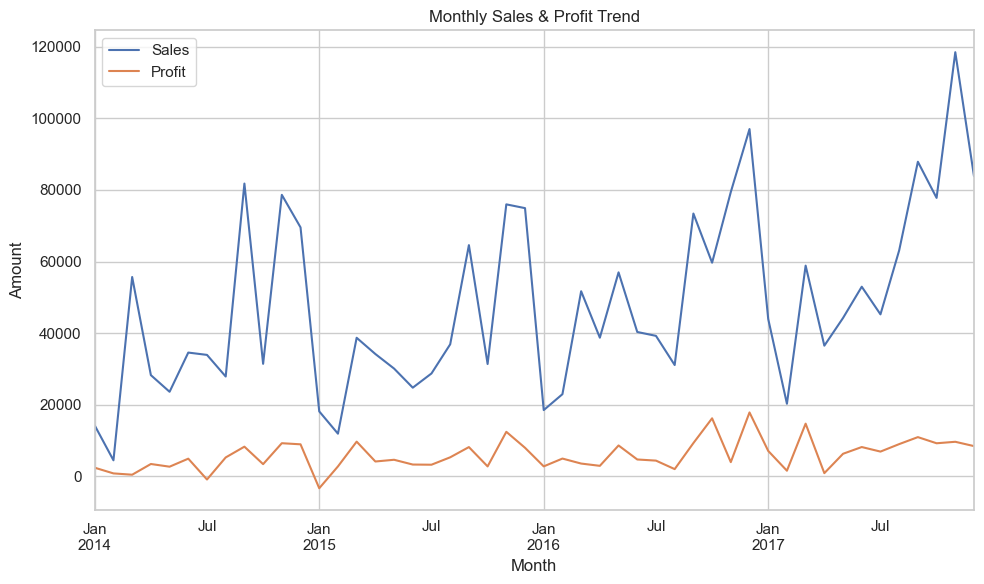

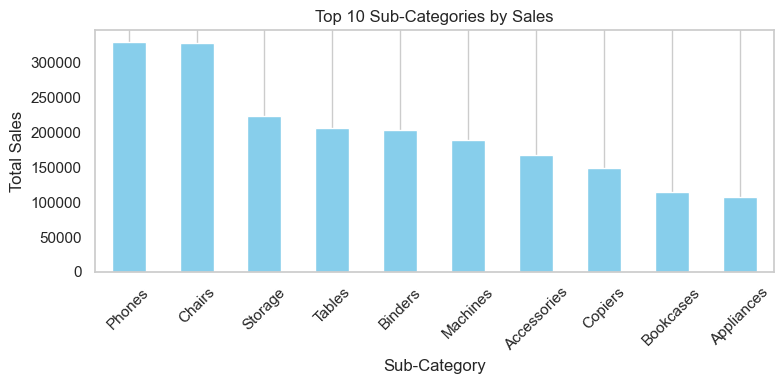

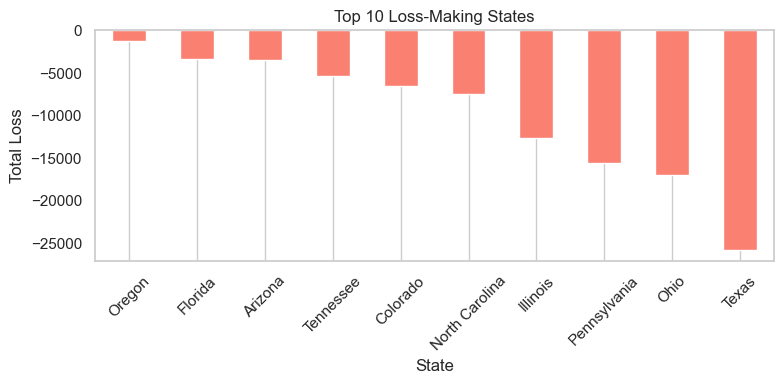

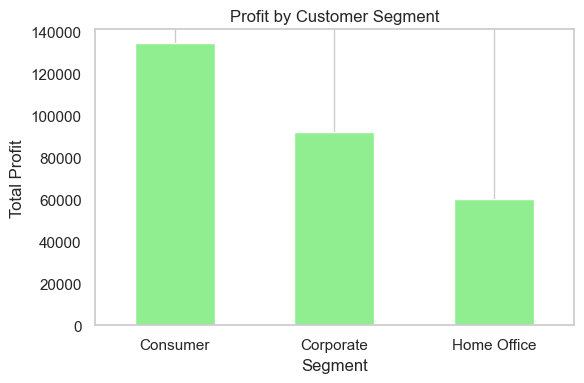

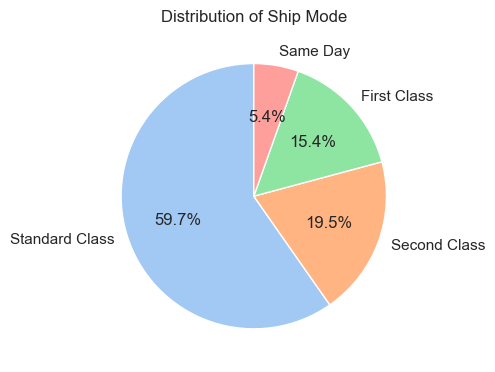

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

df.resample('M', on='Order Date')[["Sales", "Profit"]].sum().plot(title="Monthly Sales vs Profit")
plt.ylabel("Amount"); plt.grid(True); plt.show()

df.groupby("Sub-Category")["Sales"].sum().nlargest(5).plot(kind="bar", title="Top Sub-Categories")
plt.ylabel("Sales"); plt.grid(True); plt.show()

df.groupby("State")["Profit"].sum().nsmallest(5).plot(kind="bar", color="red", title="Top Loss States")
plt.ylabel("Profit"); plt.grid(True); plt.show()

df.groupby("Segment")["Profit"].sum().plot(kind="bar", title="Profit by Segment", color="green")
plt.ylabel("Profit"); plt.grid(True); plt.show()

df["Ship Mode"].value_counts().plot.pie(autopct="%1.1f%%", title="Ship Mode Distribution", ylabel="")
plt.show()


In [ ]:
# 8. Final Summary

In [ ]:
"""
Key Insight 1: Technology products in the West generate highest profit.
Key Insight 2: Office Supplies in the South are often loss-making.
Key Insight 3: Shipping mode 'Same Day' leads to higher losses in low-cost segments.
Suggestion: Focus marketing efforts on Technology in West and reduce discounting in loss areas.

"""